In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

In [2]:
BASE_PATH = os.path.join(os.getcwd(), os.pardir)
DATA_PATH = os.path.join(BASE_PATH, 'data')

In [3]:
train_df = pd.read_json(os.path.join(DATA_PATH, 'train.json'))

In [4]:
train_df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


# Histograms
## Price

In [5]:
price = train_df[['price']]

In [6]:
price.sort_values('price')

,price
53144,43
87511,45
117339,401
113599,695
113552,695
...,...
123877,135000
55437,1070000
57803,1070000
12168,1150000


In [7]:
price.mean().values[0]

3830.174035500081

In [8]:
price.mode().values[0][0]

2500

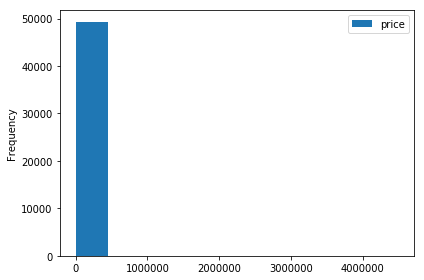

In [9]:
price.plot.hist(bins=10)
plt.tight_layout()

We see a highly biased histogram when outliers are present (only 4 examples with price > 1 million)

## Latitude

In [10]:
lats = train_df[['latitude']]

In [11]:
lats.mean().values[0]

40.74154482290525

In [12]:
lats.mode().values[0][0]

40.753

In [13]:
lats.sort_values('latitude')

,latitude
69423,0.0000
46941,0.0000
85521,0.0000
76934,0.0000
2028,0.0000
...,...
4719,42.8724
81815,42.8725
18267,43.0346
16405,44.6038


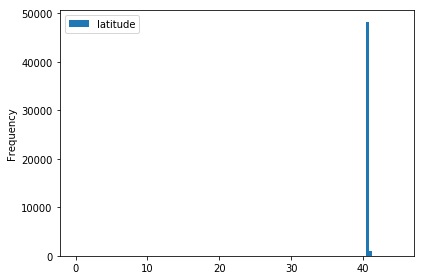

In [14]:
lats.plot.hist(bins=100)
plt.tight_layout()

## Longitude

In [15]:
lons = train_df[['longitude']]

In [16]:
lons.mean().values[0]

-73.95571552115288

In [17]:
lons.mode().values[0][0]

-73.9982

In [18]:
lons.sort_values('longitude')

,longitude
39798,-118.2710
78568,-93.2705
72896,-87.6134
104822,-86.1527
18267,-76.6336
...,...
46941,0.0000
76934,0.0000
37426,0.0000
85521,0.0000


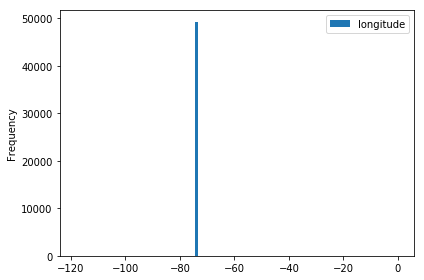

In [19]:
lons.plot.hist(bins=100)
plt.tight_layout()

Longitude and latitude have a number of entries with no values.

# Hour-wise listing trend
We can look at the 'created' attribute and basically discard the dates, leaving just the times. From the time data we can extract the hour of each listing, and then infer how many houses are listed at from 00:00 - 00:59, 01:00 - 01:59, ... 23:00 - 23:59.

In [20]:
train_df['created'].values

array(['2016-06-16 05:55:27', '2016-06-01 05:44:33',
       '2016-06-14 15:19:59', ..., '2016-04-26 05:42:03',
       '2016-04-19 02:47:33', '2016-04-20 05:34:00'], dtype=object)

In [21]:
datetime = pd.to_datetime(train_df['created'])

In [22]:
hours_count = train_df.groupby([datetime.dt.hour]).created.count()

In [23]:
hours = [x for x in datetime.dt.hour.values]

In [24]:
hours_count

created
0        55
1      5749
2     10596
3      8318
4      5021
5      7954
6      4446
7      1047
8       336
9       135
10      284
11      444
12      693
13      616
14      782
15      753
16      370
17      443
18      450
19      266
20      191
21      178
22      139
23       86
Name: created, dtype: int64

In [25]:
hours_count.sort_values(ascending=False)

created
2     10596
3      8318
5      7954
1      5749
4      5021
6      4446
7      1047
14      782
15      753
12      693
13      616
18      450
11      444
17      443
16      370
8       336
10      284
19      266
20      191
21      178
22      139
9       135
23       86
0        55
Name: created, dtype: int64

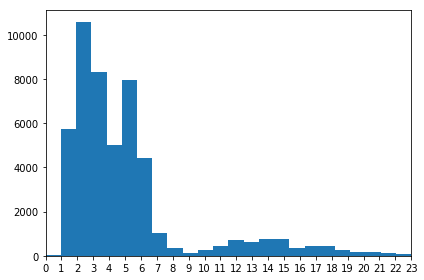

In [26]:
plt.hist(hours, bins=24)
plt.xticks([x for x in range(0, 24)])
plt.xlim(0, 23)
plt.tight_layout()
plt.show()

# Target variable values

In [27]:
interest_count = train_df['interest_level'].value_counts()
interest_count

low       34284
medium    11229
high       3839
Name: interest_level, dtype: int64

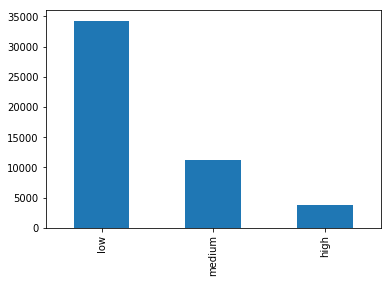

In [28]:
interest_count.plot(kind='bar')